(1137, 640)


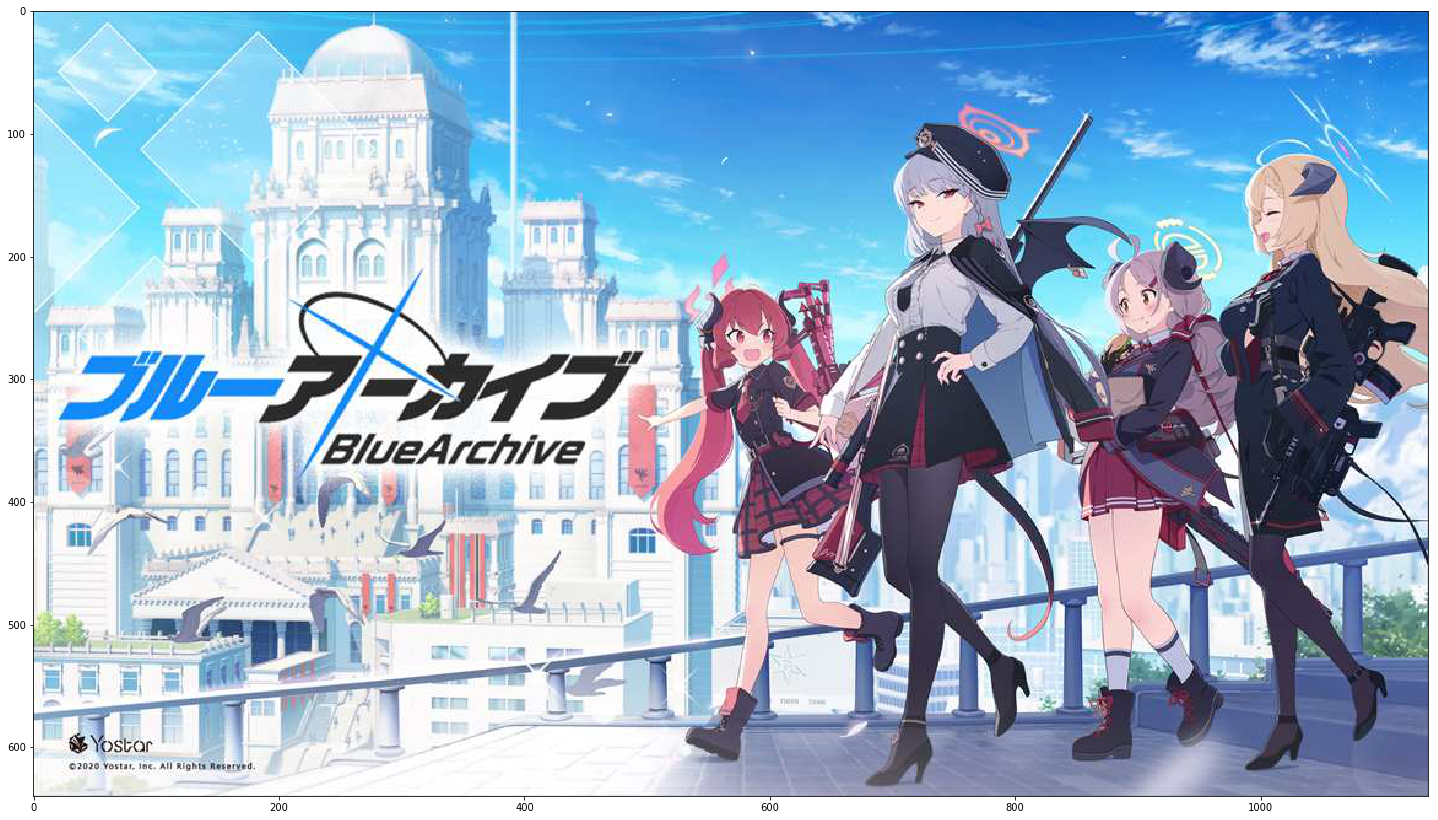

In [2]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
# img = cv2.imread("/workspaces/Kaggle/input/bluearchive.jpg")
img = Image.open("/workspaces/Kaggle/input/bluearchive.jpg")
print(img.size)
plt.figure(figsize=(25,50))
plt.imshow(img)
plt.show()

46 202 501 439
683 129 796 193
0 0.269140625 0.500390625 0.35546875 0.18515625
3 0.633203125 0.37578125 0.08828125 0.05


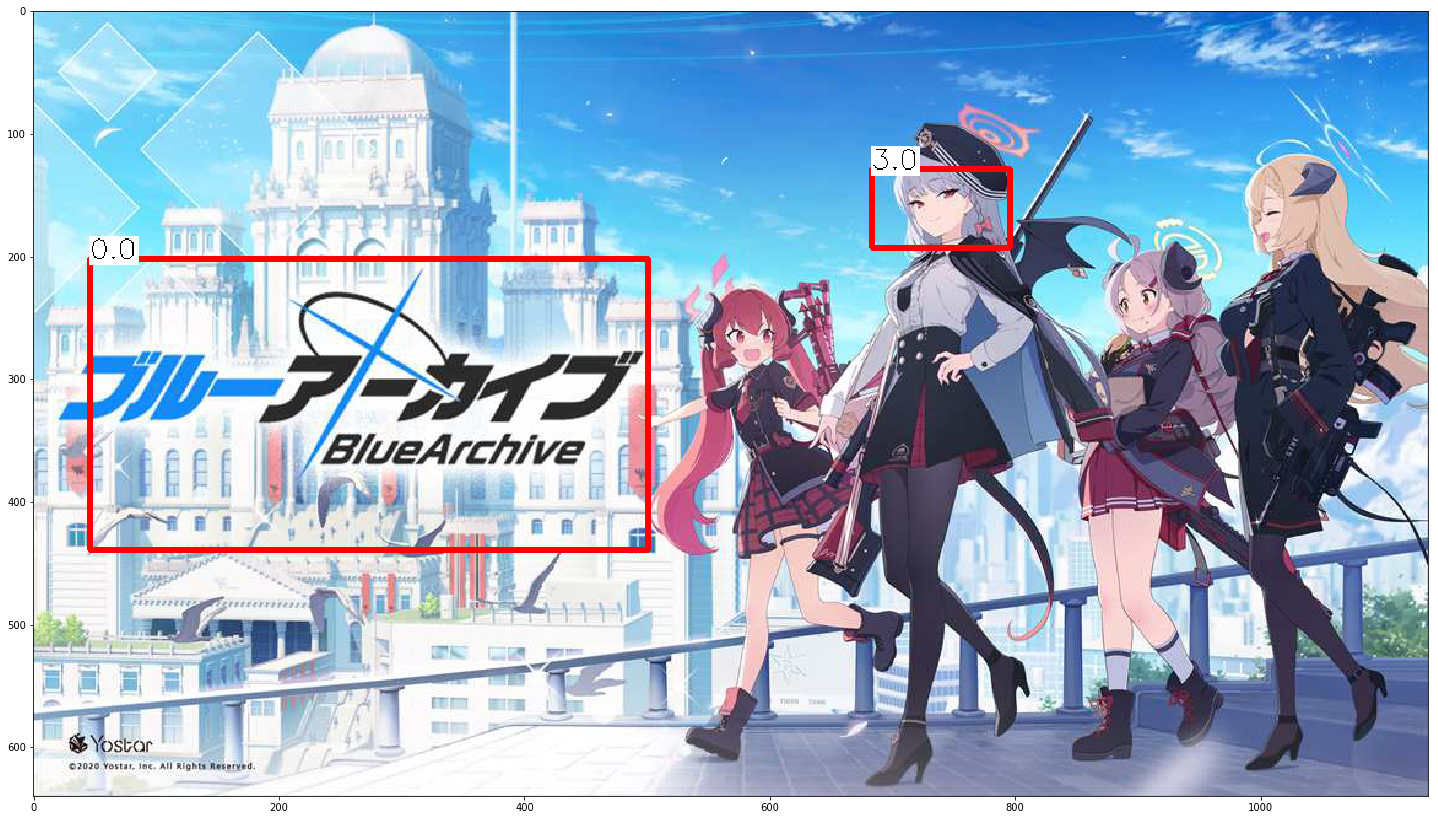

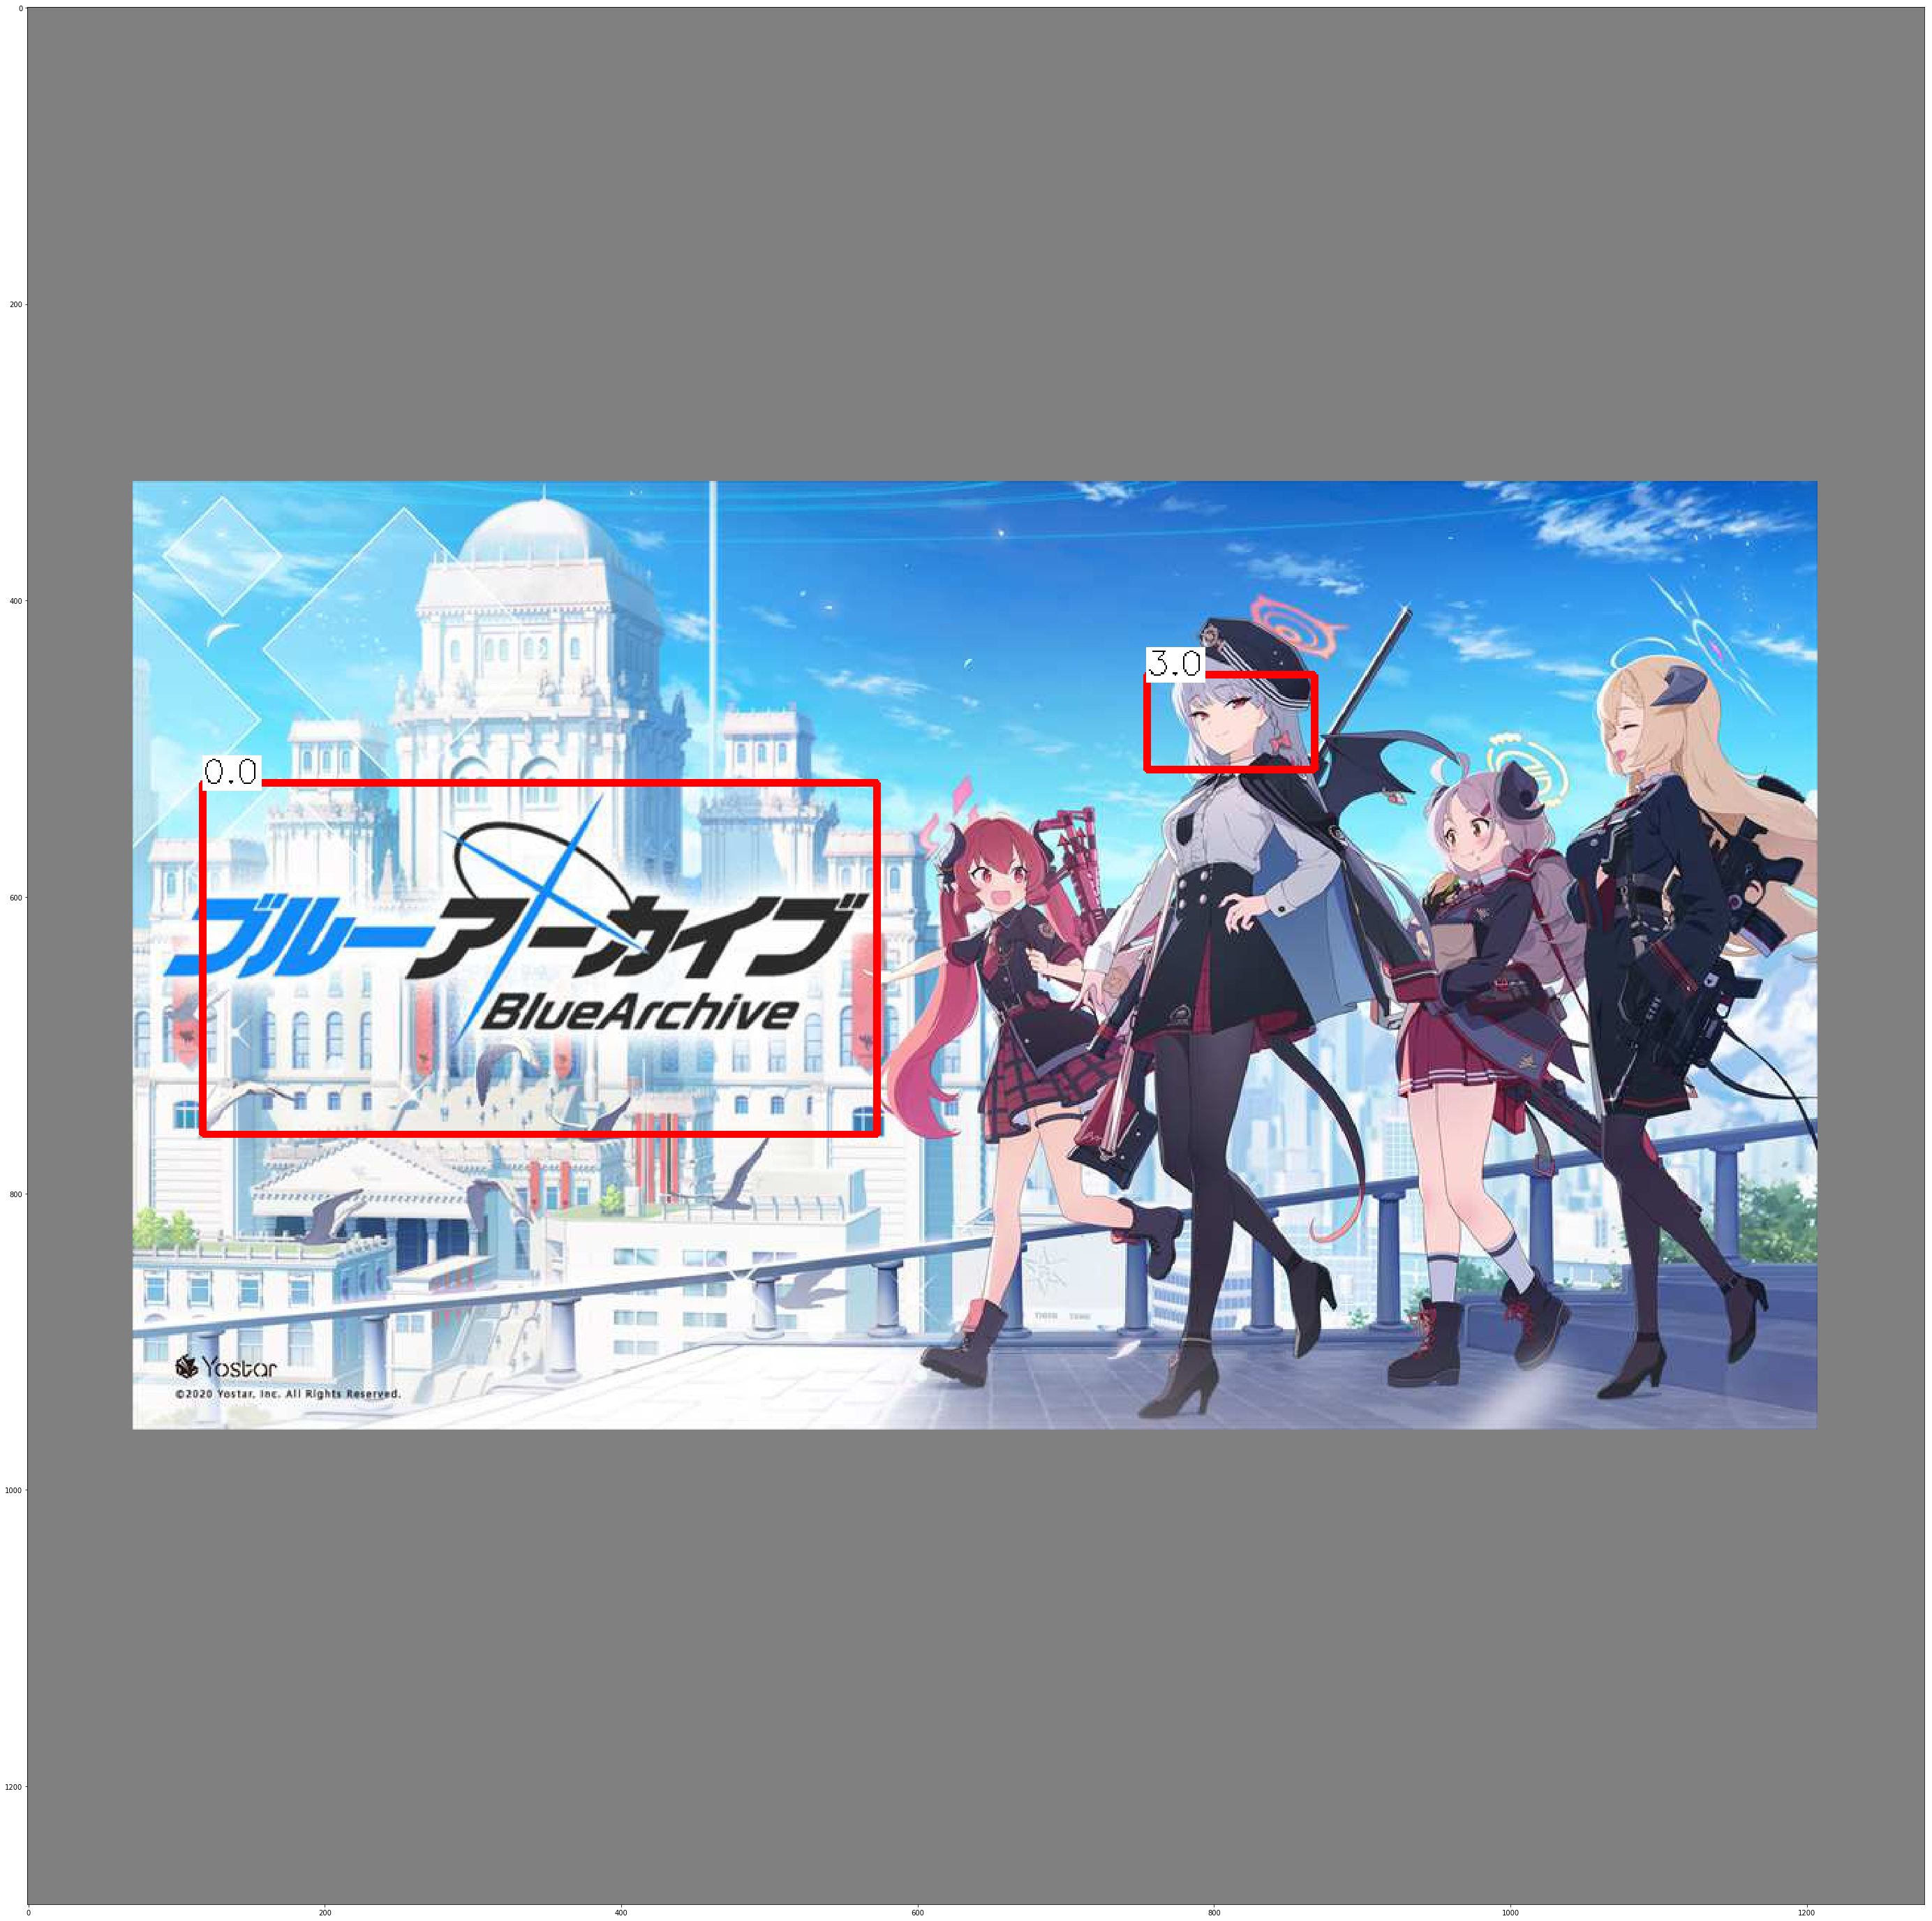

In [33]:
import numpy as np
import os, copy
def yolo_to_cord(x_c_n, y_c_n, width_n, height_n, img_width, img_height):
    ## remove normalization given the size of the image
    x_c = float(x_c_n) * img_width
    y_c = float(y_c_n) * img_height
    width = float(width_n) * img_width
    height = float(height_n) * img_height
    ## compute half width and half height
    half_width = width / 2
    half_height = height / 2
    ## compute left, top, right, bottom
    ## in the official VOC challenge the top-left pixel in the image has coordinates (1;1)
    left = int(x_c - half_width) + 1
    top = int(y_c - half_height) + 1
    right = int(x_c + half_width) + 1
    bottom = int(y_c + half_height) + 1
    return left, top, right, bottom

def cord_to_yolo(left, top, right, bottom, img_width, img_height):
    ## remove normalization given the size of the image
    x_c = float((left + right) / 2 / img_width)
    y_c = float((top + bottom) / 2 / img_height)
    width = float((right - left) / img_width)
    height = float((bottom - top) / img_height)
    return x_c, y_c, width, height

def drawGT(frame, classId, left, top, right, bottom):
    # Draw a bounding box.
    frame_gt = np.ascontiguousarray(frame)
    cv2.rectangle(frame_gt, (left, top), (right, bottom), (255, 0, 0), 3)
    label = '%s' % (classId) #comment out if you have a class_lists.txt with class names in it 

    #Display the label at the top of the bounding box
    labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    top = max(top, labelSize[1])
    frame_gt = cv2.rectangle(frame_gt, (left, int(top - round(1.5*labelSize[1]))), (left + int(round(1.5*labelSize[0])), top + baseLine), (255, 255, 255), cv2.FILLED)
    frame_gt = cv2.putText(frame_gt, label, (left, top), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 1)
    frame_gt = Image.fromarray(frame_gt.astype("uint8"), "RGB")
    return frame_gt

# 画像を1280×1280へ、bboxの調整
def transform(img, l_strip):
    N = 1280
    w, h = img.size
    space_left = (N-w) // 2
    space_top  = (N-h) // 2
    result = Image.new(img.mode, (N, N), (128, 128, 128))
    result.paste(img, (space_left, space_top))
    l_strip_new = []
    for line in l_strip:
        label, x, y, w, h = map(float, line.split())
        left, top, right, bottom = yolo_to_cord(x,\
            y, w, h, img_w, img_h)
        left_n, top_n = left + space_left, top + space_top
        right_n, bottom_n = right + space_left, bottom + space_top
        nx, ny, nw, nh = cord_to_yolo(left_n, top_n, right_n, bottom_n, N, N)
        nx, ny = round(nx, 10), round(ny, 10)
        nw, nh = round(nw, 10), round(nh, 10)
        tmp = str(int(label)) + " " + " ".join([str(nx), str(ny), str(nw), str(nh)])
        l_strip_new.append(tmp)
        l, t, r, b = yolo_to_cord(nx, ny, nw, nh, N, N)
        
        #########
        # result = drawGT(result, str(label), l, t, r, b)
    return result, l_strip_new

file_path = "/workspaces/Kaggle/bluearchive.txt"
with open(file_path) as f:
    l_strip = [s.rstrip() for s in f.readlines()]

img_path = "/workspaces/Kaggle/input/bluearchive.jpg"
img = Image.open(img_path)
img_new = copy.deepcopy(img)
img_w, img_h = img.size
# draw bbox
for line in l_strip:
    label, x, y, w, h = map(float, line.split())
    left, top, right, bottom = yolo_to_cord(x,\
        y, w, h, img_w, img_h)
    print(left, top, right, bottom)
    
    ####
    # img = drawGT(img, str(label), left, top, right, bottom)
    
img_new, l_strip_new = transform(img_new, l_strip)
    
# #########################
# plt.figure(figsize=(25,50))
# plt.imshow(img)
# plt.show()
# #########################



# #########################
# plt.figure(figsize=(50,50))
# plt.imshow(img_new)
# plt.show()
# #########################
  

['0 0.269140625 0.500390625 0.35546875 0.18515625', '3 0.633203125 0.37578125 0.08828125 0.05']


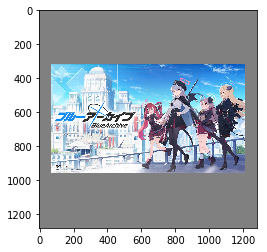

0

In [11]:
import numpy as np
import os, copy
import cv2
import matplotlib.pyplot as plt
from PIL import Image

def yolo_to_cord(x_c_n, y_c_n, width_n, height_n, img_width, img_height):
    ## remove normalization given the size of the image
    x_c = float(x_c_n) * img_width
    y_c = float(y_c_n) * img_height
    width = float(width_n) * img_width
    height = float(height_n) * img_height
    ## compute half width and half height
    half_width = width / 2
    half_height = height / 2
    ## compute left, top, right, bottom
    ## in the official VOC challenge the top-left pixel in the image has coordinates (1;1)
    left = int(x_c - half_width) + 1
    top = int(y_c - half_height) + 1
    right = int(x_c + half_width) + 1
    bottom = int(y_c + half_height) + 1
    return left, top, right, bottom

def cord_to_yolo(left, top, right, bottom, img_width, img_height):
    ## remove normalization given the size of the image
    x_c = float((left + right) / 2 / img_width)
    y_c = float((top + bottom) / 2 / img_height)
    width = float((right - left) / img_width)
    height = float((bottom - top) / img_height)
    return x_c, y_c, width, height

def drawGT(frame, classId, left, top, right, bottom):
    # Draw a bounding box.
    frame_gt = np.ascontiguousarray(frame)
    cv2.rectangle(frame_gt, (left, top), (right, bottom), (255, 0, 0), 3)
    label = '%s' % (classId) #comment out if you have a class_lists.txt with class names in it 

    #Display the label at the top of the bounding box
    labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    top = max(top, labelSize[1])
    frame_gt = cv2.rectangle(frame_gt, (left, int(top - round(1.5*labelSize[1]))), (left + int(round(1.5*labelSize[0])), top + baseLine), (255, 255, 255), cv2.FILLED)
    frame_gt = cv2.putText(frame_gt, label, (left, top), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 1)
    frame_gt = Image.fromarray(frame_gt.astype("uint8"), "RGB")
    return frame_gt

# 画像を1280×1280へ、bboxの調整
def transform(img, l_strip):
    N = 1280
    img_w, img_h = img.size
    space_left = (N-img_w) // 2
    space_top  = (N-img_h) // 2
    result = Image.new(img.mode, (N, N), (128, 128, 128))
    result.paste(img, (space_left, space_top))
    l_strip_new = []
    for line in l_strip:
        label, x, y, w, h = map(float, line.split())
        left, top, right, bottom = \
            yolo_to_cord(x, y, w, h, img_w, img_h)
        left_n, top_n = left + space_left, top + space_top
        right_n, bottom_n = right + space_left, bottom + space_top
        nx, ny, nw, nh = cord_to_yolo(left_n, top_n, right_n, bottom_n, N, N)
        nx, ny = round(nx, 10), round(ny, 10)
        nw, nh = round(nw, 10), round(nh, 10)
        tmp = str(int(label)) + " " + " ".join([str(nx), str(ny), str(nw), str(nh)])
        l_strip_new.append(tmp)
        l, t, r, b = yolo_to_cord(nx, ny, nw, nh, N, N)
        
        #########
        # result = drawGT(result, str(label), l, t, r, b)
    return result, l_strip_new


txt_path = "/workspaces/Kaggle/bluearchive.txt"
img_path = "/workspaces/Kaggle/input/bluearchive.jpg"
def img_padding(img_path, txt_path):
    with open(txt_path) as f:
        l_strip = [s.rstrip() for s in f.readlines()]

    img = Image.open(img_path)
    img_new, l_strip_new = transform(img, l_strip)
    
    keyword = "Kaggle"
    txt_save_path = txt_path.replace(keyword, "Kaggle/new")
    img_save_path = img_path.replace(keyword, "Kaggle/new")
    print(l_strip_new) #############
    with open(txt_save_path, "w") as f:
        f.write("\n".join(l_strip_new))
    plt.imshow(img_new) ##########
    plt.show() ############
    img_new.save(img_save_path)
    return 0
    
img_padding(img_path, txt_path)
  

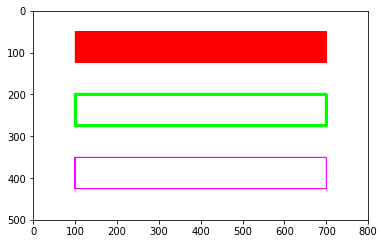

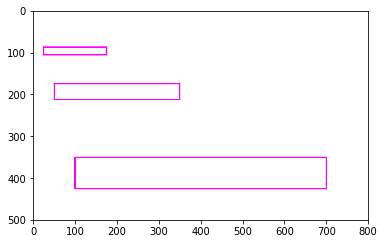

In [3]:
import cv2
import numpy as np

window = "cv2.rectangle"
window_shift = "cv2.rectangle:shift"

# 描画する画像をサイズを指定
width = 800
height = 500
size = height, width, 3

# 描画する四角形の幅と高さ
rect_w = 600
rect_h = 75

# 白で塗りつぶした画像を作成
image = np.full(size, (255, 255, 255), dtype=np.uint8)
# 四角形を線幅と線の色を変えて描画
cv2.rectangle(image, (100, 50), (100+rect_w, 50+rect_h), (255, 0, 0), cv2.FILLED, cv2.LINE_AA)
cv2.rectangle(image, (100, 200), (100+rect_w, 200+rect_h), (0, 255, 0), 5, cv2.LINE_AA)
cv2.rectangle(image, (100, 350), (100+rect_w, 350+rect_h), (255, 0, 255), 2, cv2.LINE_AA)

# 白で塗りつぶした画像を作成
image_shift = np.full(size, (255, 255, 255), dtype=np.uint8)
# 上記の3つ目の四角形対して、shiftを設定して描画（shift=0(設定なし), shift=1, shift=2）
cv2.rectangle(image_shift, (100, 350), (100+rect_w, 350+rect_h), (255, 0, 255), 2, cv2.LINE_AA)
cv2.rectangle(image_shift, (100, 350), (100+rect_w, 350+rect_h), (255, 0, 255), 2, cv2.LINE_AA, 1)
cv2.rectangle(image_shift, (100, 350), (100+rect_w, 350+rect_h), (255, 0, 255), 2, cv2.LINE_AA, 2)

# 結果の表示
plt.imshow(image)
plt.show()
plt.imshow(image_shift)
plt.show()